# Жиделев Сергей
# РИ-401002
# Лабораторная работа № 2

In [22]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
%matplotlib inline

2 задание

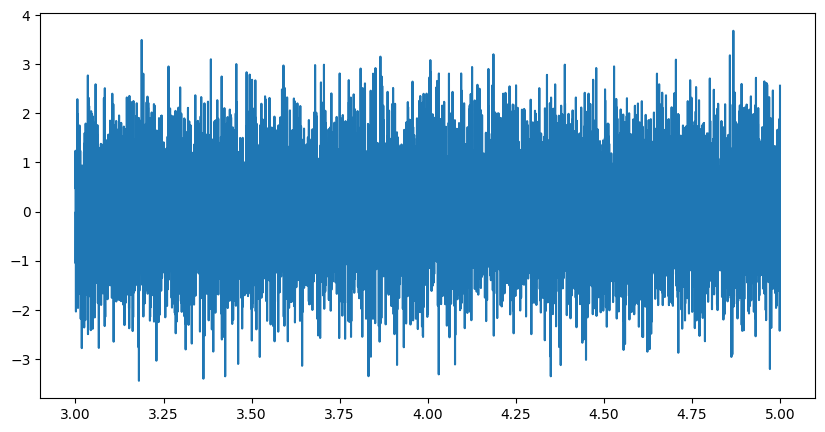

In [23]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

3 задание

In [24]:
import statsmodels.api as sm

def kpss(x, nlags = 'auto'):
    return sm.tsa.stattools.kpss(x, nlags = 'auto')

kpss(x)

<ipython-input-24-8218d9cd4279>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return sm.tsa.stattools.kpss(x, nlags = 'auto')


(0.18087375089082325,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

По значению pvalue следует принять нулевую гипотезу о том, что ряд стационарен.

7-8 задание

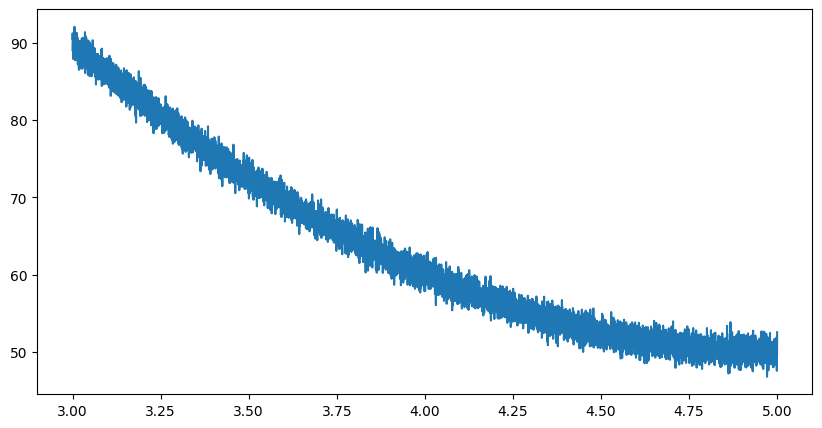

In [25]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

In [26]:
kpss(xv)

<ipython-input-24-8218d9cd4279>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  return sm.tsa.stattools.kpss(x, nlags = 'auto')


(15.981898122386223,
 0.01,
 59,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Значение pvalue равно 0.01, что явно меньше порога в 0.05, следовательно нужно отклонить нулевую гипотезу о стационарности ряда.

9 задание

In [27]:
x1, x2 = x[:len(x)//2], x[len(x)//2:]
xv1, xv2 = xv[:len(xv)//2], xv[len(xv)//2:]

for i in [stats.f_oneway(x1, x2), stats.f_oneway(xv1, xv2)]:
    print(i)

F_onewayResult(statistic=0.4949991636872849, pvalue=0.48172211038566315)
F_onewayResult(statistic=23188.176575639554, pvalue=0.0)


По результатам критерия Фишера можно сделать следующие заключения:

1) В случае с нормальным распределением, значение pvalue оказалось больше порога в 0.5, следовательно можно сделать вывод, что данные ряды принадлежат к одному распределению, поскольку их дисперсии равны

2) Во втором же случае, значение pvalue оказалось равно 0.0, следует отклонить нулевую гипотезу.

11 задание

In [28]:
for i in [stats.ttest_ind(x1, x2), stats.ttest_ind(xv1, xv2)]:
    print(i)

TtestResult(statistic=-0.703561769631697, pvalue=0.4817221103863064, df=9998.0)
TtestResult(statistic=152.27664487911318, pvalue=0.0, df=9998.0)


По результатам критерия Стьюдента можно сделать следующие заключения:

1) В случае с нормальным распределением, значение pvalue оказалось больше порога в 0.5, следовательно можно сделать вывод, что данные ряды принадлежат к одному распределению

2) Во втором же случае, значение pvalue оказалось равно 0.0, следует отклонить нулевую гипотезу.

13 задание

In [36]:
for i in [stats.skewtest(x), stats.skewtest(xv), stats.ks_2samp(x1, x2), stats.ks_2samp(xv1, xv2)]:
    print(i, end = '\n\n')

SkewtestResult(statistic=-0.24357794182523196, pvalue=0.8075577136924238)

SkewtestResult(statistic=23.66758642433643, pvalue=7.779972692661537e-124)

KstestResult(statistic=0.0142, pvalue=0.6945834812298466, statistic_location=-1.1746264693463608, statistic_sign=1)

KstestResult(statistic=0.9574, pvalue=0.0, statistic_location=60.16138541234814, statistic_sign=-1)



Skewtest - тест проверяет нулевую гипотезу о том, что асимметрия совокупности, из которой была взята выборка, такая же, как и у соответствующего нормального распределения.

ks_2samp - тест Колмогорова-Смирнова используется для проверки того, происходят ли две независимые выборки из одного распределения.

По результатам можно сказать, что в случае с нормальным распределением оба теста говорят о том, что нулевая гипотеза должна быть принята, однако нельзя сказать то же самое о равномерном распределении, значение pvalue в данных тестах значительно ниже порогов для этих тестов.

14 задание

In [30]:
x = rand.randn(10000)
y = rand.rand(10000)


print(f'Мат. ожидание x: {np.mean(x)}, Мат. ожидание y: {np.mean(y)}')

stats.ttest_ind(x, y)

Мат. ожидание x: 0.0021449885720499205, Мат. ожидание y: 0.49927498058196196


TtestResult(statistic=-47.38344861198619, pvalue=0.0, df=19998.0)

16 задание

In [31]:
xm = rand.randn(10000)
ym = rand.rand(10000)-0.5
stats.ttest_ind(xm, ym)

TtestResult(statistic=-0.40109875830067754, pvalue=0.6883517004399025, df=19998.0)

17 задание

In [32]:
from scipy.stats import norm

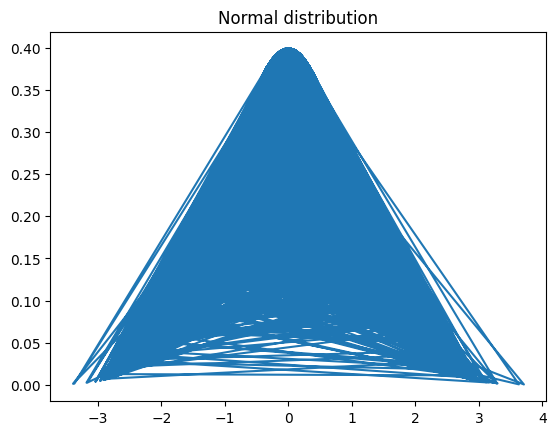

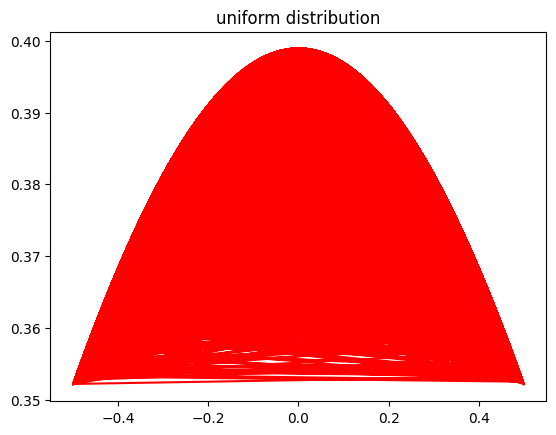

TtestResult(statistic=-0.6241780169232097, pvalue=0.5325178022819584, df=19998.0)


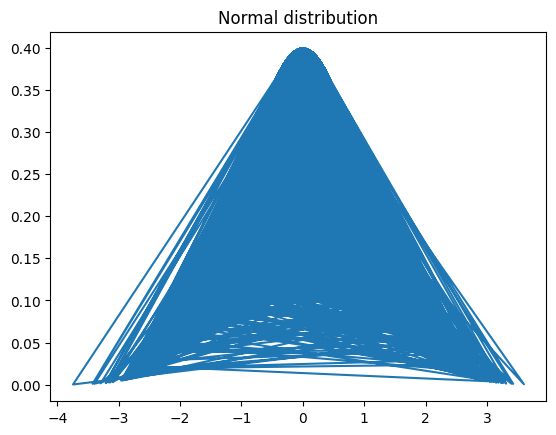

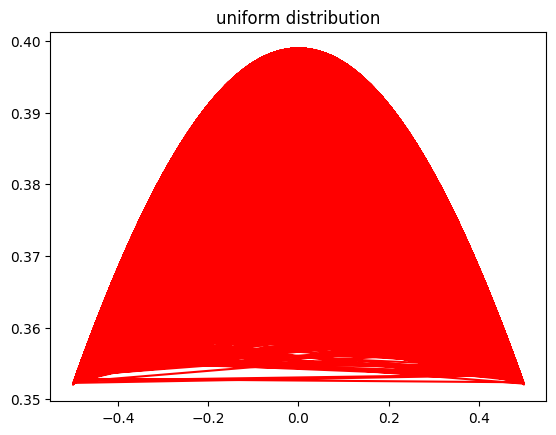

TtestResult(statistic=1.512170044638836, pvalue=0.13050641110328956, df=19998.0)


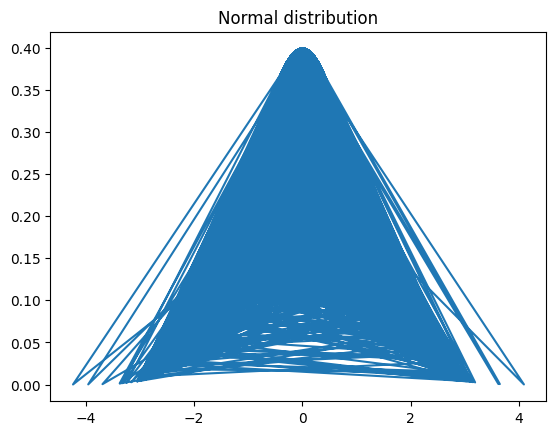

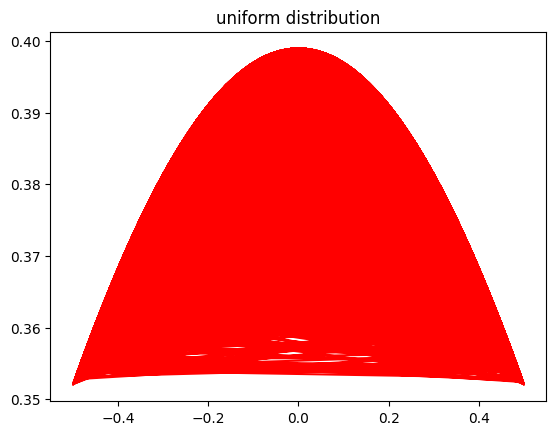

TtestResult(statistic=1.991486033762036, pvalue=0.04644105850824426, df=19998.0)


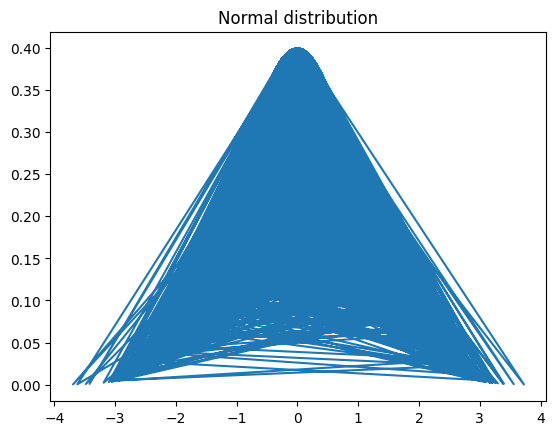

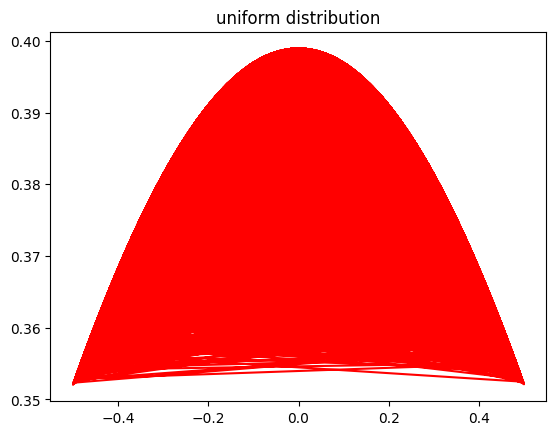

TtestResult(statistic=-0.03461884510884101, pvalue=0.9723840197944802, df=19998.0)


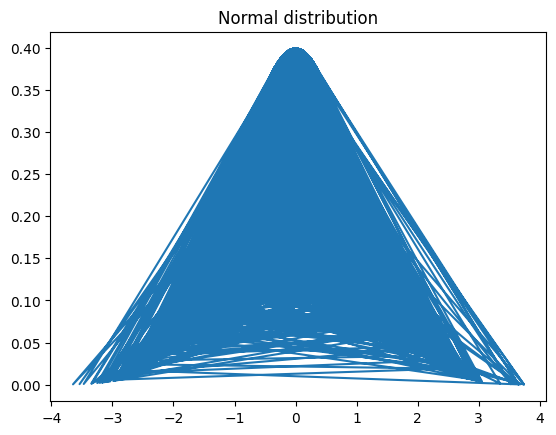

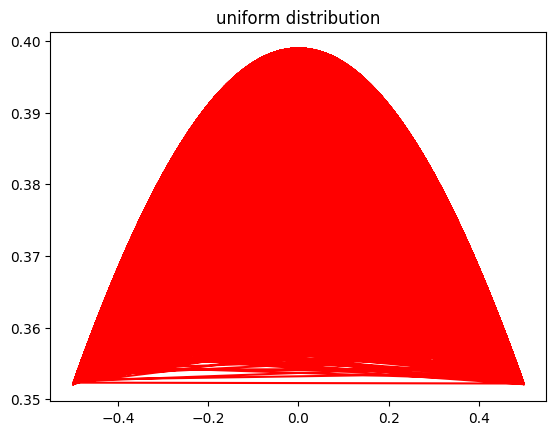

TtestResult(statistic=-0.22818342144694315, pvalue=0.8195059822463526, df=19998.0)


In [33]:
def ttest(x, y):
    return stats.ttest_ind(x, y)

for i in range(5):
    xm = rand.randn(10000)
    ym = rand.rand(10000) - 0.5
    plt.plot(xm, norm.pdf(xm))
    plt.title('Normal distribution')
    plt.show()
    plt.plot(ym, norm.pdf(ym, 0, 1), c = 'red')
    plt.title('uniform distribution')
    plt.show()

    print(ttest(xm, ym), end = '\n')


Как можно заметить после нескольких статистических тестов, значение pvalue непостоянно, что может говорить о том, что математические ожидания нормальной выборки и равномерной выборки отличаются из-за структурных различий и свойств их распределений. Сдвинув равномерную выборку на 0.5 влево, удалось получить мат. ожидание близкое к 0, что собственно и должно получаться у нормально распределения, однако это еще не означает, что нулевую гипотезу стоит принимать всегда только при равенстве мат. ожиданий.

19 задание

In [34]:
def oneway(x, y):
    return stats.f_oneway(x, y)

for i in range(5):
    xm = rand.randn(10000)
    ym = rand.rand(10000) - 0.5
    print(oneway(xm, ym), end = '\n\n')

F_onewayResult(statistic=0.3028304501827319, pvalue=0.5821195461904585)

F_onewayResult(statistic=0.3041275912281371, pvalue=0.5813124498451807)

F_onewayResult(statistic=0.03703658012671598, pvalue=0.8473925436193595)

F_onewayResult(statistic=0.923472735722491, pvalue=0.3365764130311881)

F_onewayResult(statistic=0.11243128360907063, pvalue=0.7373964693654137)



В случае с критерием Фишера наблюдается точно такая же переменность pvalue: то мы принимаем гипотезу, то отвергаем. То есть, в тех случаях, когда распределения генерировались примерно в одинаковом диапазоне(что поспособствовало сдвиг равномерного распределения налево на 0.5), то и мат. ожидания и дисперсии были примерно похожими.

In [42]:
def st(x, y):
    return (stats.skewtest(x, alternative = 'two-sided'),
            stats.skewtest(y),
            stats.ks_2samp(x[:len(x)//2], x[len(x)//2:]),
            stats.ks_2samp(y[:len(y)//2], y[len(y)//2:]))

for i in range(5):
    x = rand.randn(10000)
    y = rand.rand(10000) - 0.5
    for j in st(x, y):
        print(j)
    print()

SkewtestResult(statistic=-0.36974068298657087, pvalue=0.7115757159013876)
SkewtestResult(statistic=-0.6358494640686071, pvalue=0.5248745439041264)
KstestResult(statistic=0.018, pvalue=0.3927625063294053, statistic_location=0.38793295741354983, statistic_sign=-1)
KstestResult(statistic=0.014, pvalue=0.7112889960315587, statistic_location=-0.12850191680038991, statistic_sign=1)

SkewtestResult(statistic=-0.24093165100797864, pvalue=0.8096080906283112)
SkewtestResult(statistic=0.4737373404036065, pvalue=0.6356872222398993)
KstestResult(statistic=0.0194, pvalue=0.3035775745288207, statistic_location=-0.10543867479641587, statistic_sign=-1)
KstestResult(statistic=0.0158, pvalue=0.5605413681859366, statistic_location=0.13203942321002804, statistic_sign=-1)

SkewtestResult(statistic=-1.1369249861730575, pvalue=0.25556964585256114)
SkewtestResult(statistic=0.7078056573140467, pvalue=0.4790659526922011)
KstestResult(statistic=0.0226, pvalue=0.15550390805241585, statistic_location=0.049276823654

В каждом из 5-ти тестов обе выборки проходили два теста:

Skewtest - тест проверяет нулевую гипотезу о том, что асимметрия совокупности, из которой была взята выборка, такая же, как и у соответствующего нормального распределения.

ks_2samp - тест Колмогорова-Смирнова используется для проверки того, происходит ли выборка из определенного распределения.

В каждом наборе тестов 1-2 значения соответствуют тесту Skewtest для выборок xm, ym, а оценки pvalue для 3-4 тестов соответствуют тесту Смирнова-Колмогорова для половинок из каждых выборок.

